In [12]:
import sys
sys.path.append('..')

from sklearn.datasets import make_regression

import numpy as np
from src import grad_desc_algos as gda

import timeit

import matplotlib.pyplot as plt
from matplotlib import ticker, cm
%matplotlib inline

## Import dataset

In [109]:
features, target, coef = make_regression(n_samples=10000,
                                         n_features=2,
                                         n_informative=2,
                                         n_targets=1,
                                         noise=10.0,
                                         coef = True,
                                         random_state=1)

## Batch Gradient Descent

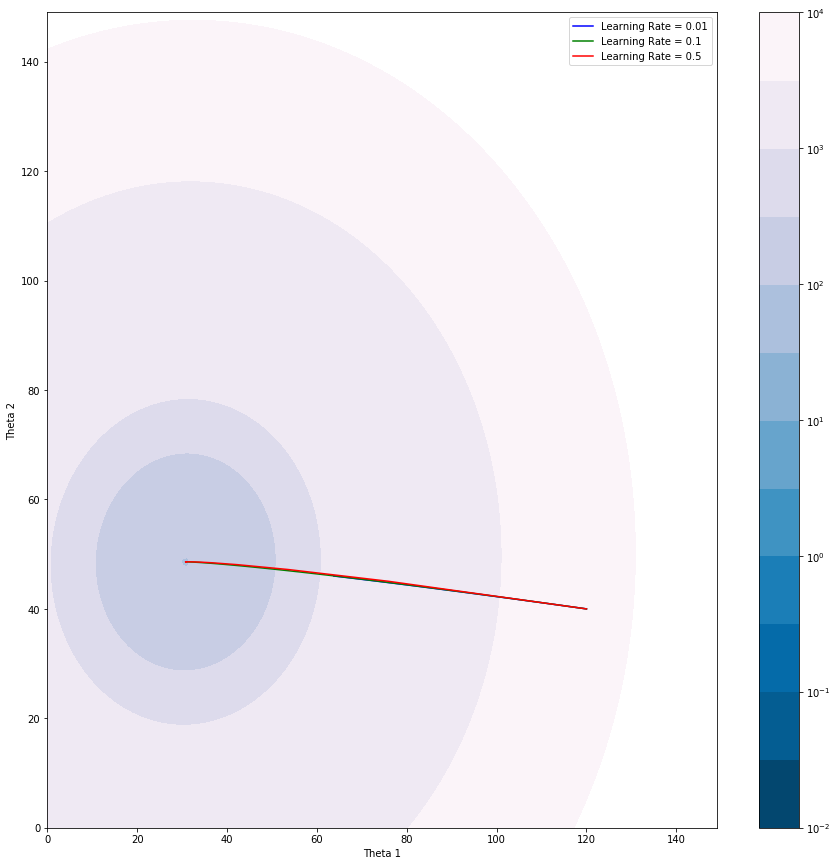

Final thetas: [30.81906981 48.58832618]
Actual Coefficents: [30.51944327 48.38204155]


In [110]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(15, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)

epochs = 100

learing = [0.01, 0.1, 0.5]
colors = ['b', 'g', 'r']
random_start = [np.array([120, 40.]) for i in range(3)]

for lr, c, rs in zip(learing, colors,random_start):
    theta = rs
    #thetas, MSE = batch_gradient_descent(features, target, theta, lr, epochs)
    thetas, MSE = gda.batch_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c, label='Learning Rate = {}'.format(lr))
    ax.legend()
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))

## Stochastic Gradient Descent

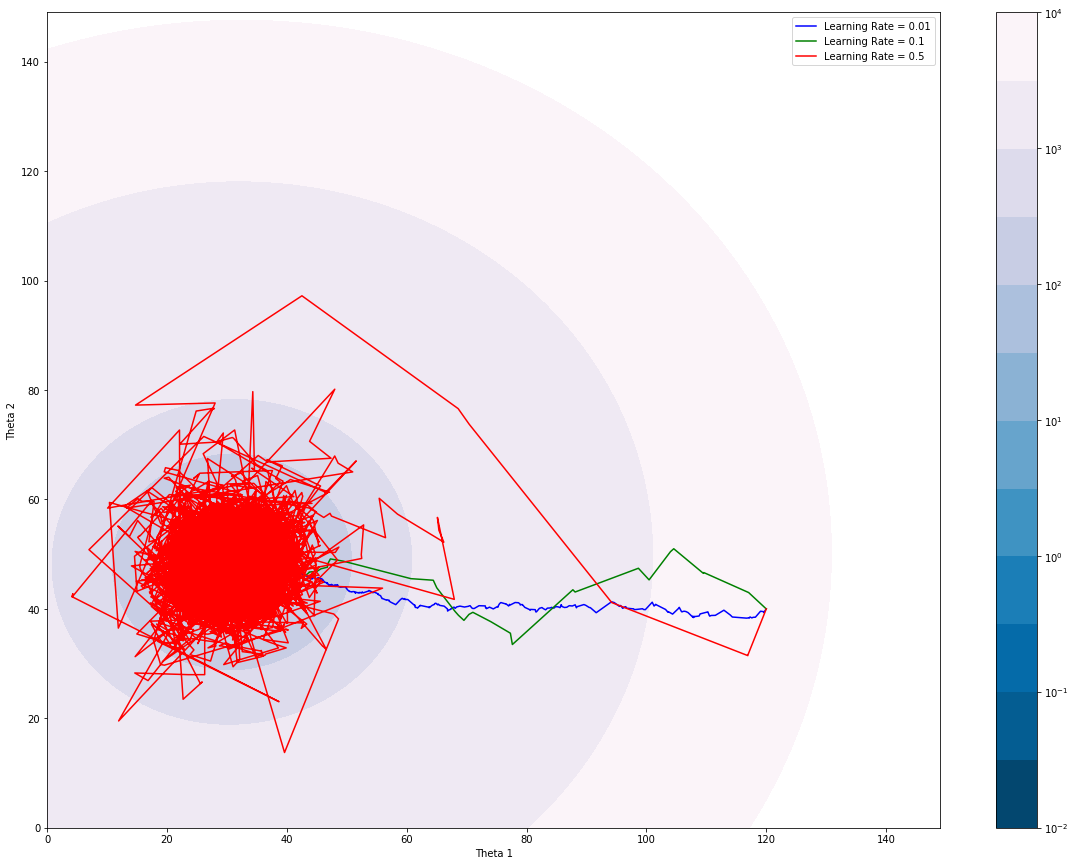

Final thetas: [32.86881993 51.78041512]
Actual Coefficents: [30.51944327 48.38204155]


In [111]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(20, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)


learing = [0.01, 0.1, 0.5]
colors = ['b', 'g', 'r']
random_start = [np.array([120, 40.]) for i in range(3)]
epochs = 100

for lr, c, rs in zip(learing, colors,random_start):
    theta = rs
    thetas, MSE = gda.stochastic_gradient_descent(features, target, theta, lr, epochs)
    #thetas, MSE = stochastic_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c, label='Learning Rate = {}'.format(lr))
    ax.legend()
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))

In [6]:
## Compare to each other. 
## minibatch GD

## Minibatch Gradient Descent

In [112]:
def minibatch_gradient_descent(X, y, weights, learning_rate, epochs, batch_size):

    cumulative_weights = weights  # initialize weights
    results = np.array([[0,0]])   # starting point

    for i in range(epochs):
        y = np.reshape(y, (y.shape[0], 1))  # Takes a single dimensional array and converts to multi-dimensional.
                                            # Need to generalize here.
        Xy = np.concatenate((X,y), axis = 1)  # combine X and y to ensure each linear equation stays the same
        np.random.shuffle(Xy)

        m = Xy.shape[0]
        
        if m % batch_size != 0:
            for i in range(m//batch_size):
                X = Xy[batch_size*(i):batch_size*(i+1), :X.shape[1]] # Split X  back out
                y = Xy[batch_size*(i):batch_size*(i+1):, -1]  # Split y back out
                weights, MSE = gda.gd(X, y, weights, learning_rate)
                cumulative_weights = np.vstack([cumulative_weights, weights])
                results = np.vstack([results, np.array([i+1, MSE])])  # Will return multiple values for each iteration
            X = Xy[batch_size*(m//batch_size):, :X.shape[1]] # Split X  back out
            y = Xy[batch_size*(m//batch_size):, -1]
            weights, MSE = gda.gd(X, y, weights, learning_rate)
            cumulative_weights = np.vstack([cumulative_weights, weights])
            results = np.vstack([results, np.array([i+1, MSE])])
            return cumulative_weights, results
        
        else:
            for i in range(m//batch_size):
                X = Xy[batch_size*(i):batch_size*(i+1), :X.shape[1]] # Split X  back out
                y = Xy[batch_size*(i):batch_size*(i+1):, -1]  # Split y back out
                weights, MSE = gda.gd(X, y, weights, learning_rate)
                cumulative_weights = np.vstack([cumulative_weights, weights])
                results = np.vstack([results, np.array([i+1, MSE])])
            return cumulative_weights, results

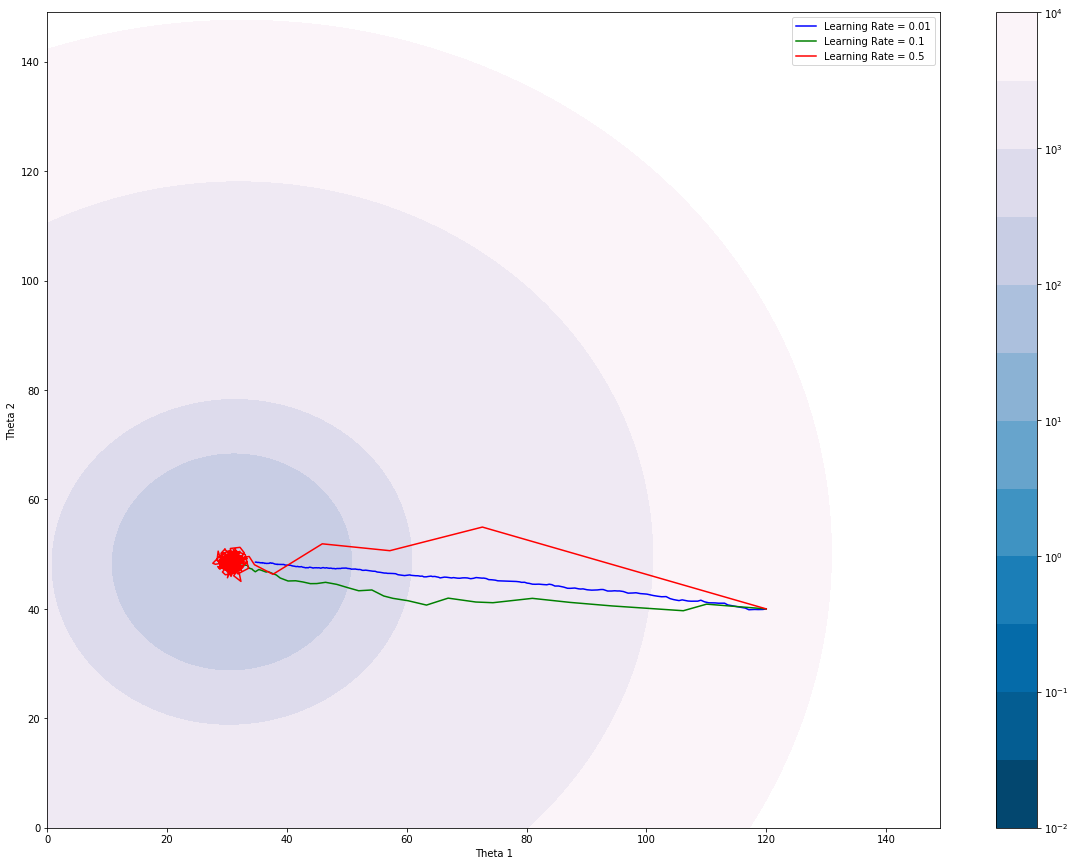

Final thetas: [30.5911238  48.15661388]
Actual Coefficents: [30.51944327 48.38204155]


In [113]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(20, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)


learing = [0.01, 0.1, 0.5]
colors = ['b', 'g', 'r']
random_start = [np.array([120, 40.]) for i in range(3)]
epochs = 100
batch_size = 32

for lr, c, rs in zip(learing, colors,random_start):
    theta = rs
    thetas, MSE = minibatch_gradient_descent(features, target, theta, lr, epochs, batch_size)
    #thetas, MSE = stochastic_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c, label='Learning Rate = {}'.format(lr))
    ax.legend()
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))